<a href="https://colab.research.google.com/github/srivishnu2805/MachineLearning-CH.SC.U4CSE23249-SRIVISHNU/blob/main/Logistic_Regression/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [12]:
from google.colab import files
uploaded = files.upload()

# Read the uploaded file into a DataFrame
data = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))
print("First 5 rows of the data:")
print(data.head())

Saving data.csv to data (2).csv
First 5 rows of the data:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [13]:
print("\nNull values in each column:")
print(data.isnull().sum())


Null values in each column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [14]:
# Convert Gender to binary: Male=1, Female=0
data['Gender_binary'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [15]:
feature_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
X = data[feature_cols]
y = data['Gender_binary']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nX_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


X_train shape: (800, 4), X_test shape: (200, 4)


In [17]:
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_mat)
print("\nAccuracy Score:", acc)
print("Accuracy in Percentage =", acc*100)


Confusion Matrix:
 [[69 36]
 [58 37]]

Accuracy Score: 0.53
Accuracy in Percentage = 53.0


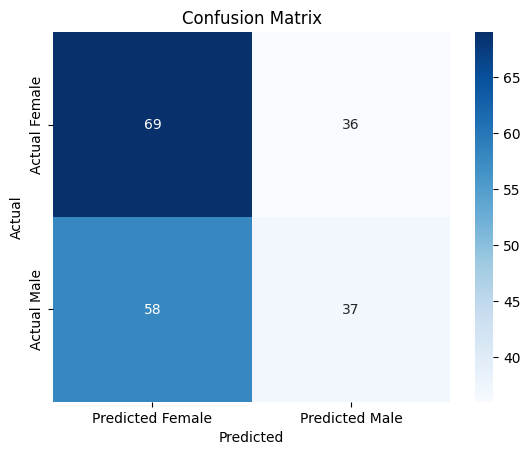

In [18]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Female','Predicted Male'],
            yticklabels=['Actual Female','Actual Male'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()